<img src='./figures/logo_ecole_polytechnique_IPP.png' style='position:absolute; top:0; right:0;' width='80px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Algorithms for Discrete Mathematics, year 2, semester 1</center>
<center>Lecturer: Ziad Kobeissi <a href="mailto:ziad.kobeissi@inria.fr">(send mail)</a></center>
<center>Notebook by Lucas Gérin</center>

# Graphs and Matrices 3: Test

## Table of contents

- [Exercise 1: $a$-even words](#isolated)
- [Exercise 2: Ehrenfest urn](#color)
- [Exercise 3: Gambler ruin](#RW)
- [Exercise 4: Paths in the sun](#sun)



In [2]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [3]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


<!--<div markdown=1 class="Rmk"> Here is the Latex code of a matrix that you can copy/paste throughout the notebook:
$$
M=
\begin{matrix}
v_1 \\ v_2 \\ v_3 
\end{matrix}
\begin{pmatrix}
1 & 1 & 0\\
0 & 0 & 1\\
0 & 1 & 0\\
\end{pmatrix}.
$$-->


<div markdown=1 class=Abstract>

# Please read!

#### Guidelines for graded notebooks

* This notebook is graded, you must submit your work (only the .pynb file) on the moodle at the end of the session.
* Submission is due at 5:32 pm. No late submission is permitted (the submission form will be closed at 5.32).
* The work is **individual**. Copy/pasting has been very severely punished in previous years.
* You are allowed to access previous notebooks and the lecture notes (and any online documentation on numpy, python,...).
* The four exercises are independent. You can of course solve the exercices in any order.
* **Each function or script must be tested** (for your sake, it also must be commented).
* Mathematical explanations have to be given in the corresponding "Answer" cell (not as comments of the code). Try to be rigorous and concise.
* Here is a sample of a matrix in LateX that you can copy/paste if needed:
$$
A=
\begin{matrix}
 u \\ v \\ w 
\end{matrix}
\begin{pmatrix}
0 & 1 & 0  \\
0 & 0 & 0\\
0 &  1 & 1\\
\end{pmatrix}.
$$


Here is a sample of a code to define a matrix in numpy and raise it to some power:

In [4]:
TransitionMatrix=np.zeros([3,3])
for k in range(3):
    TransitionMatrix[k,k]=1/2
    TransitionMatrix[k,(k+1)%3]=1/2
print('A transition matrix M:')
print(TransitionMatrix)
print('M**4 =')
print(np.linalg.matrix_power(TransitionMatrix,4))
print('not to be confused with:')
print(TransitionMatrix**4)

A transition matrix M:
[[0.5 0.5 0. ]
 [0.  0.5 0.5]
 [0.5 0.  0.5]]
M**4 =
[[0.3125 0.3125 0.375 ]
 [0.375  0.3125 0.3125]
 [0.3125 0.375  0.3125]]
not to be confused with:
[[0.0625 0.0625 0.    ]
 [0.     0.0625 0.0625]
 [0.0625 0.     0.0625]]


<a id='isolated'></a>
## Exercise 1. $a$-even words

<div markdown=1 class="DoIt"> 

We consider words $w$ with letters $a,b,c$. We say that $w$ is $a$-<i>even</i> the number of $a$ it contains is even. For instance
$$
caab,
\quad
cabbacaa
\quad
\text{ and }
\quad
ababacbacaa
$$
are $a$-<i>even</i> while
$$
a,
\quad
abaa
\quad
\text{ and }
\quad
cbabaacbbcaba
$$
are not.
Let $E_n$ be the number of $a$-even words with $n$ letters.

Compute $E_{20}$ using a graph and its adjacency matrix. Explain carefully which graph and which coefficients of the matrix you consider.

<i>(To check your result: I find $E_{8}=9842$)</i>


<div markdown=1 class="Answers"> 

Explain here the strategy.

we have 2 states for a word with n characters: (1) contains an odd # of a
(0) contains an even # of a

=> we can use a transition matrix with initial state being (0) <br>
transitions are <br>
(1) -> (0) (we put a) <br>
 (0) -> (1) (we put a)  <br>
 (1) --*2--> (1) (we put b or c) <br> (0) --*2--> (0) (we put b or c)

In [18]:

# Question 1

# init = np.array([1,0]) not necessary

Q = np.zeros([2,2])

Q[0][0] = 2
Q[1][1] = 2
Q[1][0] = Q[0][1] = 1

# we must go from 0 to 0 so:
def E(n):
    return np.linalg.matrix_power(Q , n)[0][0]

print(E(9) , E(20), E(21))




9842.0 1743392201.0 5230176602.0


<a id='color'></a>
## Exercise 2. Ehrenfest urn

<div markdown=1 class="DoIt"> 
Let $N=4m$ for some inteegr $m\geq1$. Consider the discrete-time Ehrenfest urn with two compartments $A$ and $B$, containing $N$ indistinguishable balls in total. At each time step, one of the $N$ balls is chosen uniformly at random and moved to the other compartment.

Let $X_t\in\{0,1\dots,N\}$ denote the number of balls in compartment $A$ at time $t$. Assume that the process starts with: $X_0=N/4=m$.

<b>Question 1</b>. We admit that $(X_k)_{k\geq 0}$ is a Markov chain with vertex set $\{0,1,\dots,N\}$. Give its transition matrix. (Justify briefly.)

<div markdown=1 class="Answers"> 
<b>Question 1.</b>

$$
M=
\begin{matrix}
0 \\ 1 \\ 2 \\ 3 \\ ... \\ N 
\end{matrix}
\begin{pmatrix}
0 & 1 & 0 & ... \\
\frac{1}{n} & 0 & \frac{n-1}{n} \\
0 & \frac{2}{n} & 0 & \frac{n-2}{n} & ... \\
... \\
 ..&..& \frac{i}{n} & 0 & \frac{n-i}{n} & ... \\
 ... \\
 & & & & 1 & 0
\end{pmatrix}.
$$


we take the matrix to represent # of balls in first urn
=> remove with proba $$ \frac{i}{n} $$ and add with proba $$ 1-\frac{i}{n} $$ 


<div markdown=1 class="DoIt"> 
<b>Question 2.</b> Write a code which computes for every $N,k,i$ the probability $\mathbb{P}(X_k=i)$. For $N=20$, and $k=60$ plot the distribution $i\mapsto \mathbb{P}(X_k=i)$.

<i>(To check your result: for $N=20$ you must find $\mathbb{P}(X_{10}=5)=0.1115837\dots$)</i>

0.11158371987499997


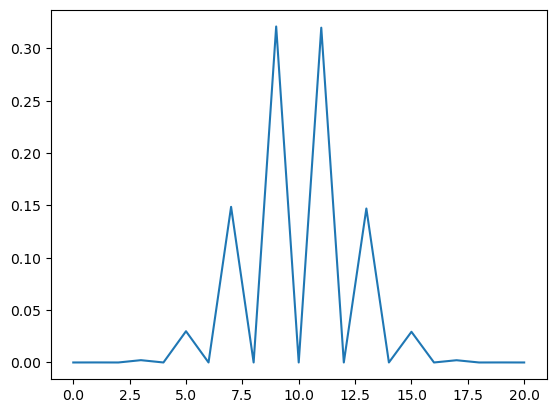

In [23]:
# Question 2

def M (n):
    ret = np.zeros([n+1,n+1])
    for i in range(1,n):
        ret[i][i-1] = i/n
        ret[i][i+1] = (n-i)/n
    ret[0][1] = ret[n][n-1] = 1
    return ret

@np.vectorize
def P(n , k , i):
    Q = M(n)
    x0 = n // 4
    init = np.zeros([n+1])
    init[x0] = 1
    return (init @ np.linalg.matrix_power(Q , k))[i]

print(P(20 , 10 , 5)) # OK

plt.plot(range(21) , P(20 , 60 , range(21)))
plt.show()


<div markdown=1 class="DoIt"> 
<b>Question 3.</b> It can be proved (this is beyond the level of Bachelor 2) that, 
$$
\mathbb{P}(X_{N/4+N^2}=N/2)\stackrel{N\to+\infty}{\sim}\sqrt{\frac{8}{\pi N}}.
$$
In order to illustrate this asymptotic property, show a plot of $N\mapsto \sqrt{N}\mathbb{P}(X_{N/4+N^2}=N/2)$ for $N=4m$ and $2\leq m\leq 50$.

<br>

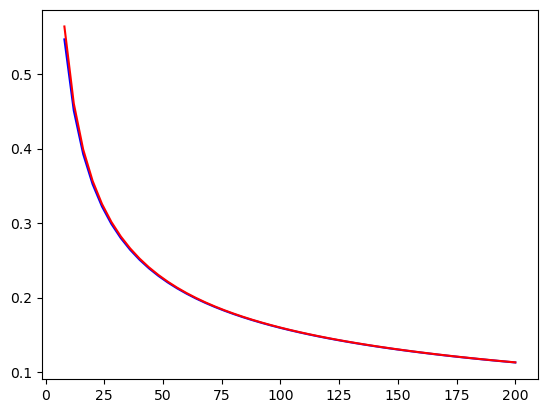

In [31]:
# Question 3

@np.vectorize
def P2 (n):
    return P(n , n//4 + n**2, n // 2)

@np.vectorize
def benchmark (n):
    return sqrt(8 / (pi * n))

plt.plot(range(8, 201, 4) , P2(range(8, 201, 4)), color="b")
plt.plot(range(8, 201, 4) , benchmark(range(8, 201, 4)), color="r")

plt.show()



<div markdown=1 class="DoIt"> 
Let $T_N\in\{N/4,N/4+1,\dots \}$ be the random variable defined by the first time at which the compartment $A$ contains exactly $N/2$ balls, i.e.,
$$
    T_N
    =
    \inf_{k\geq0}\{X_{k}=N/2\}.
$$
<b>Question 4.</b> Write a code which computes for every $N,t$ the probability $\mathbb{P}(T_N\leq t)$. You may modify the Markov Chain (i.e., modify the transition matrix from question 2) to do this. Justify your approach.

<div markdown=1 class="Answers"> 

**Question 4.**

when we reach $N/2$ we absorb the state (i.e. M[n/2][n/2] = 1 and M[n/2][i] = 0 for all other i

=> the other states work just fine, independently of n/2 and they send transitions to n/2 correctly
then, state n/2 keeps the chance that we ever reached n/2 in our process

note: all the states [i] now represent "what is the chance that I am at [i] at time t, without ever passing through n/2"

In [48]:
# Question 4

def PT (n , t):
    Q = M(n)
    Q[n//2][n//2-1] = Q[n//2][n//2+1] = 0
    Q[n//2][n//2] = 1
    x0 = n // 4
    init = np.zeros([n+1])
    init[x0] = 1
    return (init @ np.linalg.matrix_power(Q , t))[n//2]

print(PT(8 , 5))

0.703125


<a id='RW'></a>

## Exercise 3: Gambler's ruin

A gambler enters a casino with $n$ euros. On each round, they win one euro with probability $p\in(0,1)$ and lose one euro with probability $1-p$. The game continues until the gambler is ruined (wealth $0$) or reaches $N> n$ euros. Here we take $p=0.5$ (the game is fair).

The result of round $\ell\geq1$ is a random variable $X_{\ell}\in\{-1,1\}$.
The total wealth of the gambler after round $\ell$ is $S_{\ell}$, with
\begin{align*}
S_0&=n,\\
S_{\ell}&=n+X_1+X_2+\dots+X_{\ell}.
\end{align*}
We assume that the sequence $(X_{\ell})_{\ell\geq0}$ is independent. 



We consider the random variable $\tau_{n,N}$ given by the first time at which $(S_{\ell})$ hits either $0$ or $N$:
$$
\tau_{n,N}= \min_{\ell\geq 1}\{S_{\ell}\in\{0,N\}\}.
$$

<div markdown=1 class="DoIt"> 
Using a transition matrix on the set $\{0,1,\dots,N\}$ write a function which computes $\mathbb{P}(\tau_{n,N} \leq \ell)$ for every given $n,N,\ell$.<br><br>
(I find $\mathbb{P}(\tau_{5,10} \leq 20)=0.5255...$.)

<div markdown=1 class="Answers"> 

Explain here your strategy.

the initial state is $Id_n(x)$ 
then, the transitions are: i --- p ---> i+1 
and i -- 1-p ---> i-1
except for 0 and N, which are absorbant


In [49]:
# Your code here

def M (N , p = 1/2): 
    ret = np.zeros([N+1 , N+1])
    ret[0][0] = 1
    ret[N][N] = 1
    for i in range (1 , N):
        ret[i][i-1] = 1-p
        ret[i][i+1] = p
    return ret

def P_tau (n , N , l):
    init = np.zeros([N+1])
    init[n] = 1
    rezultant = init @ np.linalg.matrix_power(M(N) , l)
    return rezultant[0] + rezultant[N]

print (P_tau(5, 10, 20))



0.5255470275878906


<a id='RW'></a>

## Exercise 4: Paths in the sun

For $n\geq 1$, we define the <i>$n$-sun</i> as the graph with vertex set $\{v_1,\dots,v_{n},w_1,\dots,w_n\}$ in which:
* Each $v_i$ is connected to $v_{i+1\ \mathrm{mod}\ n}$ and $v_{i-1\ \mathrm{mod}\ n}$
* Each $w_i$ is connected to $v_i$ and $v_{i+1\ \mathrm{mod}\ n}$

Here is a picture of the $n$-sun for $n=6$:
<img src="figures/new_sun.jpg" style="width: 450px;"/>


<div markdown=1 class="DoIt"> 

For $n=10$, compute the number of paths starting at $v_1$ and ending at $v_1$ of length $25$ in the $n$-sun. Explain clearly the strategy.<br>
<i>(For $n=5$ you should find $814657963746$ paths of length $25$.)</i>

<div markdown=1 class="Answers"> 

Explain here your strategy.
we must represent the graph as an adjacency matrix, then if we raise this matrix to the power 25 we obtain exactly for all i , j, the number of paths from i to j of len 25.

this can be proven by induction.
base case: the initial adj matrix shows # of paths from i to j in mat[i][j] (obvious, there is an edge(or more!) between i j)
induction:
if $P_k(M^k)$ is true, then $ M^{k+1} = M^k \cdot M $. hence $M^{k+1}_{i,j} = \sum_k M^k_{i,l} \cdot M_{l,j}$.
which we proved is equal to # of paths of len k from i to l times the nr of paths of len 1 from l to j, which is equal to nr of paths from i to j if we sum over k


In [60]:
# Your code here

def n_sun (n):
    v = [i for i in range(n)]
    w = [i + n for i in range (n)]
    G = np.zeros([2*n , 2*n])
    for i in range (n):
        G[v[i]][v[(i+1)%n]] = 1

        G[v[(n+i-1)%n]][v[i]] = 1
        G[v[i]][v[(n+i-1)%n]] = 1
        
        
        G[w[i]][v[(i+1)%n]] = 1
        
        G[w[i]][v[i]] = 1
        G[v[i]][w[i]] = 1
        G[v[(i+1)%n]][w[i]] = 1
        
    return G


# v_1 is node 0 in our indexing

def nr_paths (n , length):
    G = n_sun(n)
    # print(G)
    return np.linalg.matrix_power(G , length)[0][0]

print(nr_paths(5 , 25)) # test OK

print(f"answer for n=10 is " , nr_paths(10 , 25)) 



814657963746.0
answer for n=10 is  448372983376.0
